Task 1: Read the lab notes and write down the purpose of each command in the this notebook.

In [7]:
##load the libarys 
from sklearn.datasets import load_digits

In [8]:
## import the data 
digits = load_digits()

In [9]:
#print the description of the data
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [13]:
## this is will give you the target values
digits.target[1:20]

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
## give you the shape of the data rows and columns 
digits.data.shape

(1797, 64)

In [17]:
## looking at the sample data of 13
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [19]:
## prints the data sample 13 into integer
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [21]:
## identifies the target value of the data set 13 
digits.target[13]

3

In [23]:
import matplotlib.pyplot as plt

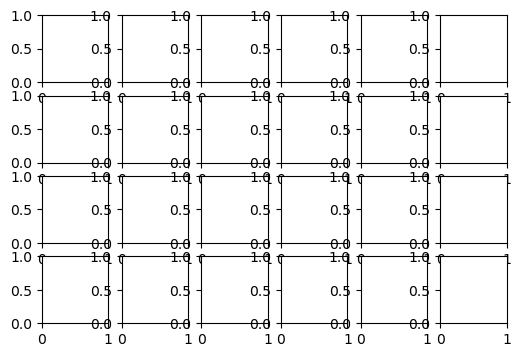

In [24]:
##plot the graph 
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

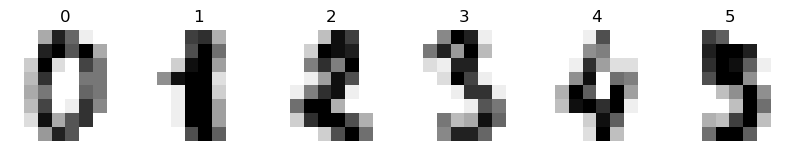

In [25]:
##draws the target data 
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for axes, image, target in zip(axes, digits.images, digits.target):
    axes.set_axis_off()
    axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axes.set_title(target)

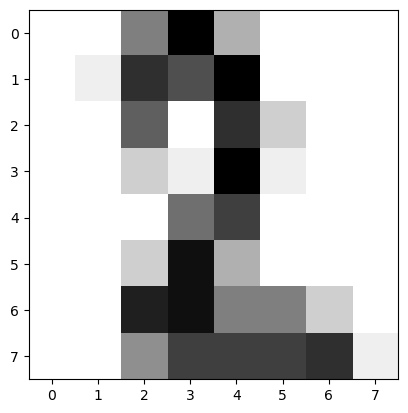

In [27]:
##draws the data of 22 
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

In [28]:
##splits the data into test and training data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)


In [29]:
#shows the size of the train data, which is 1437
X_train.shape

(1437, 64)

In [30]:
#shows the size of the target train data, which is 1437
y_train.shape

(1437,)

In [37]:
#shows the size of the test data which is 360
X_test.shape

(360, 64)

In [39]:
#import the k neighbors class 
from sklearn.neighbors import KNeighborsClassifier

In [41]:
#creat the object of k neighbor
knn = KNeighborsClassifier()

In [43]:
#use the training data to create the Ai
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [45]:
#predicts the target values
predicted = knn.predict(X=X_test)

In [47]:
#get the test results and store in an array
expected = y_test

In [49]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [51]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [53]:
#comparing the predicted results with the real results 
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [55]:
wrong

[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4)]

In [57]:
#calculates the accacry of the data 
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


In [59]:
#impors the confusion matrix calls 
from sklearn.metrics import confusion_matrix

In [61]:
#fits the predicted and expected results into the matrix 
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [63]:
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]], dtype=int64)

In [65]:
#imports the evalution of classifaction class 
from sklearn.metrics import classification_report

In [67]:
#gets the target name of each value (1,2,3,4,5,6,7,8,9,0)
names = [str(digit) for digit in digits.target_names]

In [69]:
#calculates each of the target's values of the precision, recall,f10score, support
print(classification_report(expected, predicted,
          target_names=names))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [71]:
#importing the libary 
import pandas as pd

In [73]:
#build the confusion matrix 
confusion_df = pd.DataFrame(confusion, index=range(10),
         columns=range(10))

In [75]:
import seaborn as sns

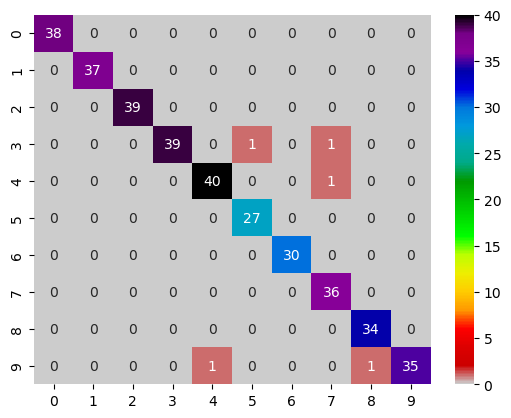

In [77]:
#plot that data in matrix
axes = sns.heatmap(confusion_df, annot=True,
         cmap='nipy_spectral_r')

In [83]:
from sklearn.model_selection import cross_val_score

In [78]:
from sklearn.model_selection import KFold

In [94]:
# Create an instance of KFold
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [85]:
# Perform cross-validation
scores = cross_val_score(estimator=knn, X=digits.data,
    y=digits.target, cv=kfold)


In [87]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [89]:
#gets the mean accuracy of the cross val score
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.72%


In [91]:
#gets the standard deviation
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.75%
